In [ ]:
pip install pymysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import pymysql
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from tensorflow import keras

In [ ]:

db = pymysql.connect(
    host='finalproject.cdqhyewfduka.us-east-1.rds.amazonaws.com',
    user='admin',
    password='Sri199838',
    database='sys',
    connect_timeout=10
)
cur = db.cursor()

In [ ]:
query = 'SELECT * FROM Date_Dimension_Tab'

# Execute the query and fetch the results into a list of tuples
cursor = db.cursor()
cursor.execute(query)
data = cursor.fetchall()

# Convert the list of tuples to a Pandas DataFrame
Date_Dimension_Tab = pd.DataFrame(data, columns=[i[0] for i in cursor.description])
Date_Dimension_Tab

,date_key,date,year,month,day,weekday,holiday,season
0,1229,2023-05-08,2023,5,8,Monday,0,Unknown
1,1230,2023-05-05,2023,5,5,Friday,0,Unknown
2,1231,2023-04-28,2023,4,28,Friday,0,Unknown
3,1232,2023-04-21,2023,4,21,Friday,0,Unknown
4,1233,2023-04-14,2023,4,14,Friday,0,Unknown
...,...,...,...,...,...,...,...,...
1222,2451,1999-12-10,1999,12,10,Friday,0,Unknown
1223,2452,1999-12-03,1999,12,3,Friday,0,Unknown
1224,2453,1999-11-26,1999,11,26,Friday,0,Unknown
1225,2454,1999-11-19,1999,11,19,Friday,0,Unknown


In [ ]:
query = 'SELECT * FROM Stock_Price_Fact_Tab'

# Execute the query and fetch the results into a list of tuples
cursor = db.cursor()
cursor.execute(query)
data = cursor.fetchall()

# Convert the list of tuples to a Pandas DataFrame
Stock_Price_Fact_Tab = pd.DataFrame(data, columns=[i[0] for i in cursor.description])
Stock_Price_Fact_Tab

,date_key,open_price,high_price,low_price,close_price,volume
0,1229,123.76,123.92,122.55,123.40,3657686
1,1230,126.35,126.75,121.76,123.65,21164660
2,1231,125.55,127.25,124.56,126.41,20644224
3,1232,128.30,130.98,125.27,125.73,30341128
4,1233,129.83,131.11,126.00,128.14,19506500
...,...,...,...,...,...,...
1222,2451,113.00,122.12,107.56,109.00,58626000
1223,2452,104.94,112.87,102.12,111.87,37670000
1224,2453,105.50,109.87,101.81,105.00,37165600
1225,2454,96.00,105.12,92.62,103.94,61550800


In [ ]:
# Join the two DataFrames on the date_key column
df = pd.concat([Date_Dimension_Tab, Stock_Price_Fact_Tab], axis=1, join='inner')
df

,date_key,date,year,month,day,weekday,holiday,season,date_key,open_price,high_price,low_price,close_price,volume
0,1229,2023-05-08,2023,5,8,Monday,0,Unknown,1229,123.76,123.92,122.55,123.40,3657686
1,1230,2023-05-05,2023,5,5,Friday,0,Unknown,1230,126.35,126.75,121.76,123.65,21164660
2,1231,2023-04-28,2023,4,28,Friday,0,Unknown,1231,125.55,127.25,124.56,126.41,20644224
3,1232,2023-04-21,2023,4,21,Friday,0,Unknown,1232,128.30,130.98,125.27,125.73,30341128
4,1233,2023-04-14,2023,4,14,Friday,0,Unknown,1233,129.83,131.11,126.00,128.14,19506500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,2451,1999-12-10,1999,12,10,Friday,0,Unknown,2451,113.00,122.12,107.56,109.00,58626000
1223,2452,1999-12-03,1999,12,3,Friday,0,Unknown,2452,104.94,112.87,102.12,111.87,37670000
1224,2453,1999-11-26,1999,11,26,Friday,0,Unknown,2453,105.50,109.87,101.81,105.00,37165600
1225,2454,1999-11-19,1999,11,19,Friday,0,Unknown,2454,96.00,105.12,92.62,103.94,61550800


In [ ]:

# Preprocess the data
# Define the input features and target variable
numeric_features = ['year', 'month', 'day', 'open_price', 'high_price', 'low_price', 'volume']
#categorical_features = ['weekday', 'holiday', 'season']
target = ['close_price']

In [ ]:
# Concatenate the numeric features and target variable
df = pd.concat([df[numeric_features+target]], axis=1)



In [ ]:
df

,year,month,day,open_price,high_price,low_price,volume,close_price
0,2023,5,8,123.76,123.92,122.55,3657686,123.40
1,2023,5,5,126.35,126.75,121.76,21164660,123.65
2,2023,4,28,125.55,127.25,124.56,20644224,126.41
3,2023,4,21,128.30,130.98,125.27,30341128,125.73
4,2023,4,14,129.83,131.11,126.00,19506500,128.14
...,...,...,...,...,...,...,...,...
1222,1999,12,10,113.00,122.12,107.56,58626000,109.00
1223,1999,12,3,104.94,112.87,102.12,37670000,111.87
1224,1999,11,26,105.50,109.87,101.81,37165600,105.00
1225,1999,11,19,96.00,105.12,92.62,61550800,103.94


In [ ]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.set_index('date', inplace=True)

# Split the dataset into training and testing sets
train_data = df[df.index < '2022-01-01']
test_data = df[df.index >= '2022-01-01']

In [ ]:
# Split the data into training, validation, and test sets
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.2)
test_size = len(df) - train_size - val_size
#train_data = df[:train_size]
val_data = df[train_size:train_size+val_size]
#test_data = df[-test_size:]

In [ ]:
# Scale the input features and target variable using a MinMaxScaler
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
val_data_scaled = scaler.transform(val_data)
test_data_scaled = scaler.transform(test_data)

MinMaxScaler object from the scikit-learn library is used to scale the input features and target variable of the training, validation, and testing sets.

The MinMaxScaler scales the data to a given range, usually between 0 and 1. This is done to normalize the data and improve the performance of machine learning models.

The first line of code creates a MinMaxScaler object called 'scaler'. The next three lines of code apply the 'fit_transform()' method of the scaler object to the training set, and the 'transform()' method to the validation and testing sets. The 'fit_transform()' method first fits the scaler to the training data and then applies the scaling to the same data. The 'transform()' method applies the scaling that was learned from the training data to the validation and testing sets.

After scaling the data, the resulting scaled data is stored in new variables, such as 'train_data_scaled', 'val_data_scaled', and 'test_data_scaled'. These variables can then be used as input for machine learning models.

Overall, scaling the input features and target variable using a MinMaxScaler is a common preprocessing step in machine learning to ensure that the data is on a comparable scale and to prevent features with large magnitudes from dominating the model.

In [ ]:
# Define the LSTM model
model = keras.Sequential([
    keras.layers.LSTM(64, input_shape=(train_data.shape[1]-1, 1)),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

 defines an LSTM model for time series data analysis, with a single LSTM layer, a dense output layer, and an optimizer and loss function configured for training the model.






In [ ]:

# Train the LSTM model on the training set
X_train = np.array(train_data_scaled[:, :-1])
y_train = np.array(train_data_scaled[:, -1:])
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
history = model.fit(X_train, y_train, epochs=52, batch_size=64, validation_split=0.1)

# Evaluate the LSTM model on the validation set
X_val = np.array(val_data_scaled[:, :-1])
y_val = np.array(val_data_scaled[:, -1:])
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
val_loss = model.evaluate(X_val, y_val)


Epoch 1/52
17/17 [==============================] - 4s 42ms/step - loss: 0.1112 - val_loss: 0.0183
Epoch 2/52
17/17 [==============================] - 0s 12ms/step - loss: 0.0297 - val_loss: 0.0060
Epoch 3/52
17/17 [==============================] - 0s 11ms/step - loss: 0.0230 - val_loss: 0.0094
Epoch 4/52
17/17 [==============================] - 0s 11ms/step - loss: 0.0189 - val_loss: 0.0067
Epoch 5/52
17/17 [==============================] - 0s 12ms/step - loss: 0.0163 - val_loss: 0.0073
Epoch 6/52
17/17 [==============================] - 0s 11ms/step - loss: 0.0137 - val_loss: 0.0061
Epoch 7/52
17/17 [==============================] - 0s 11ms/step - loss: 0.0111 - val_loss: 0.0060
Epoch 8/52
17/17 [==============================] - 0s 11ms/step - loss: 0.0083 - val_loss: 0.0046
Epoch 9/52
17/17 [==============================] - 0s 11ms/step - loss: 0.0055 - val_loss: 0.0036
Epoch 10/52
17/17 [==============================] - 0s 12ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 11/

In [ ]:
# Create a new scaler for the target variable
target_scaler = MinMaxScaler()
target_scaler.fit(train_data.iloc[:, -1].values.reshape(-1, 1))

# Make predictions on the test set using the LSTM model
X_test = np.array(test_data_scaled[:, :-1])
y_test = np.array(test_data_scaled[:, -1:])
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred = target_scaler.inverse_transform(y_pred)
y_test = target_scaler.inverse_transform(y_test)


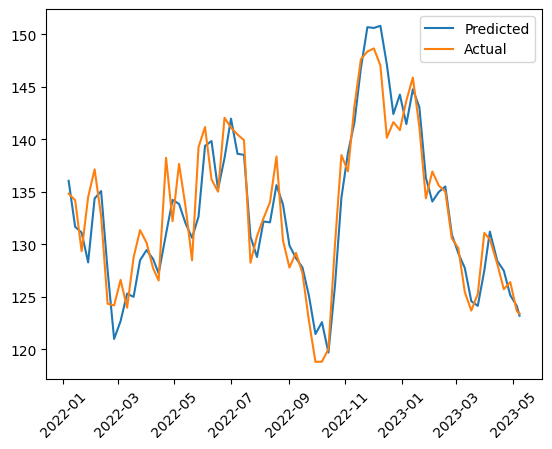

In [ ]:

# Plot the predicted and actual stock prices
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.plot(test_data.index, y_pred[:, 0], label='Predicted')
plt.plot(test_data.index, y_test[:, 0], label='Actual')
plt.legend()
plt.show()


API - rds = pthon rds- pyton - visulization

In [ ]:
Predicted = pd.DataFrame({'Date': test_data.index, 'PPrice': y_pred[:, 0],'APrice': y_test[:, 0]})

In [ ]:
Predicted 

,Date,PPrice,APrice
0,2023-05-08,123.203773,123.40
1,2023-05-05,124.139145,123.65
2,2023-04-28,125.155365,126.41
3,2023-04-21,127.501671,125.73
4,2023-04-14,128.420090,128.14
...,...,...,...
66,2022-02-04,134.375458,137.15
67,2022-01-28,128.284027,134.50
68,2022-01-21,131.123535,129.35
69,2022-01-14,131.675903,134.21


In [ ]:
# Insert each row of data into the MySQL table
for index, row in Predicted.iterrows():
    Date = row['Date']
    APrice = row['APrice']
    PPrice = row['PPrice']
    print(f"Inserting row for {Date}")
    cur.execute("INSERT INTO VisualData (Date, PPrice, APrice) VALUES (%s, %s, %s)", (Date, PPrice, APrice))

# Commit the changes to the database
db.commit()


Inserting row for 2023-05-08 00:00:00
Inserting row for 2023-05-05 00:00:00
Inserting row for 2023-04-28 00:00:00
Inserting row for 2023-04-21 00:00:00
Inserting row for 2023-04-14 00:00:00
Inserting row for 2023-04-06 00:00:00
Inserting row for 2023-03-31 00:00:00
Inserting row for 2023-03-24 00:00:00
Inserting row for 2023-03-17 00:00:00
Inserting row for 2023-03-10 00:00:00
Inserting row for 2023-03-03 00:00:00
Inserting row for 2023-02-24 00:00:00
Inserting row for 2023-02-17 00:00:00
Inserting row for 2023-02-10 00:00:00
Inserting row for 2023-02-03 00:00:00
Inserting row for 2023-01-27 00:00:00
Inserting row for 2023-01-20 00:00:00
Inserting row for 2023-01-13 00:00:00
Inserting row for 2023-01-06 00:00:00
Inserting row for 2022-12-30 00:00:00
Inserting row for 2022-12-23 00:00:00
Inserting row for 2022-12-16 00:00:00
Inserting row for 2022-12-09 00:00:00
Inserting row for 2022-12-02 00:00:00
Inserting row for 2022-11-25 00:00:00
Inserting row for 2022-11-18 00:00:00
Inserting ro

In [ ]:
import requests
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol=IBM&apikey=N3AKAEZVXPVFCEWC'
r = requests.get(url)
api_data = r.json()

api_data=api_data['Weekly Time Series']
date = list(api_data.keys())
stock_dataset_raw=pd.DataFrame(api_data)
stock_dataset_raw.head()
stock_dataset_api=stock_dataset_raw.T
se = pd.Series(date)
stock_dataset_api['Date'] = se.values
stock_dataset_api.shift(periods=2, axis="columns")
new_col=['Open', 'High', 'Low', 'Close', 'Volume',"Date"]
stock_dataset_api.columns=new_col
stock_dataset_api = stock_dataset_api.reset_index(drop=False)
stock_dataset_api =stock_dataset_api.drop(columns=['Date'])   
stock_dataset_api = stock_dataset_api.rename(columns={'index': 'Date'})    
stock_dataset_api.iloc[0]                               
                                             

Date      2023-05-08
Open        123.7600
High        123.9200
Low         122.5500
Close       123.4000
Volume       3663818
Name: 0, dtype: object

In [ ]:
from datetime import datetime
date_string = stock_dataset_api.iloc[0,0] 
date_obj = datetime.strptime(date_string, '%Y-%m-%d')
year = date_obj.year
month = date_obj.month
day = date_obj.day


# Define the new input data
new_data = pd.DataFrame({
    'year': [date_obj.year],
    'month': [date_obj.month],
    'day': [date_obj.day],
    'open_price': [stock_dataset_api.iloc[0, 1] ],
    'high_price': [stock_dataset_api.iloc[0, 2] ],
    'low_price': [stock_dataset_api.iloc[0, 3] ],
    'volume': [stock_dataset_api.iloc[0, 5] ]
})
# Add the close_price feature to the new input data with a default value of 0
new_data['close_price'] = 0

# Scale the input data using the same scaler as before
new_data_scaled = scaler.transform(new_data)

# Reshape the input data for use in the model
X_new = np.array(new_data_scaled[:, :-1])
X_new = np.reshape(X_new, (X_new.shape[0], X_new.shape[1], 1))

# Make predictions on the new input data using the LSTM model
y_new = model.predict(X_new)

# Inverse transform the predicted values
y_new = target_scaler.inverse_transform(y_new)

# Print the predicted close prices for the new input data
print("the predicted close prices for the new input data", y_new[:, 0])


1/1 [==============================] - 0s 28ms/step
the predicted close prices for the new input data [123.203865]


In [ ]:
# Create data frames for predicted and actual stock prices
df_pred = pd.DataFrame(y_pred, columns=['predicted'])
df_actual = pd.DataFrame(y_test, columns=['actual'])

# Save data frames as CSV files
df_pred.to_csv('predicted_stock_prices.csv', index=False)
df_actual.to_csv('actual_stock_prices.csv', index=False)
